### Add boundary to existing network

* manage basic workspace and project environment
* add boundary pores using marker 
* How to add models collection to network

Before importing network from porespy to openpnm, it's better to firstly create a new workspace. However, you can also manage your workspace by typing: pn.project

The project is inherented in each OpenPNM object for management conveniency.

In [ ]:
import numpy as np
import porespy as ps
import openpnm as op
import matplotlib.pyplot as plt
import random
np.random.seed(0)
im = np.load('1.npy')
im1 = np.load('1.npy')

snow = ps.networks.snow2(
    phases=im,
    phase_alias={True:"void",False:"solid"},
    voxel_size=2.32e-06)

##### You need to add boundary faces from extracted network
ws = op.Workspace()
pn = op.io.network_from_porespy(snow.network)
pn = ps.networks.label_boundaries(pn)
pn.add_model_collection(op.models.collections.geometry.spheres_and_cylinders)
pn.regenerate_models()
proj = pn.project

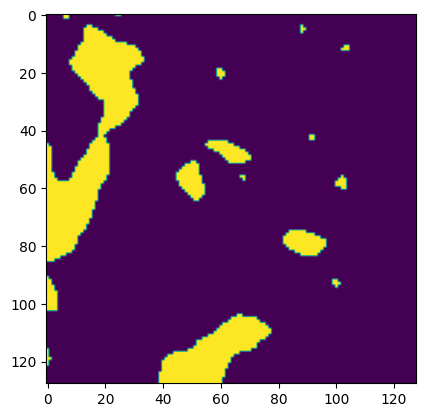

In [2]:
plt.imshow(im[0,::])

#### Calculate porosity of current pore network from using equation:

$ \frac{( V_{pore} + V_{throat} )}  {V_{total}}$

In [29]:
cube_volume = (2.32e-06*128)**3
phi = ( pn['pore.volume'].sum() + pn['throat.volume'].sum() ) / cube_volume
ori_phi = ps.metrics.porosity(im)
print(f'\nPorosity of pore network is {phi}')
print(f'\nThe original porosity of image is {ori_phi}')


Porosity of pore network is 0.19532954474100964

The original porosity of image is 0.17746496200561523


### Pore network model structure

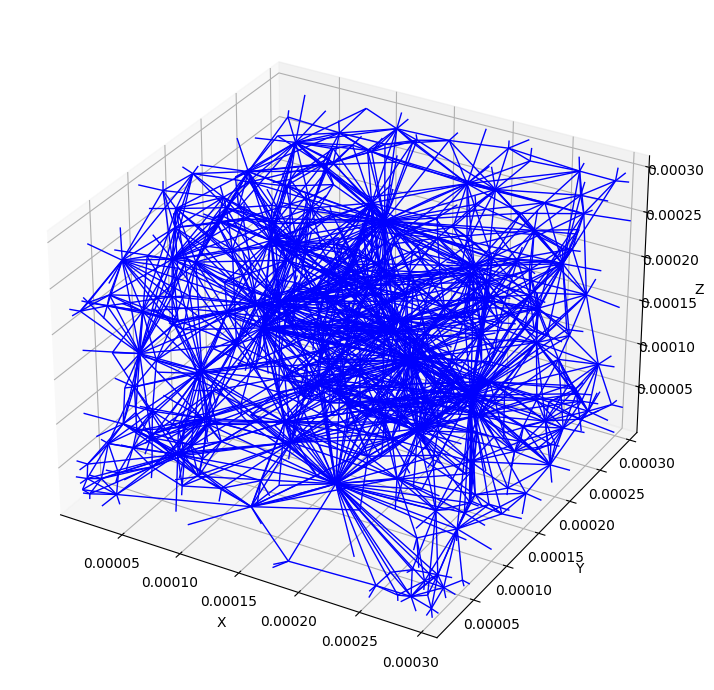

In [30]:
fig, ax = plt.subplots(figsize=(7, 7))
op.visualization.plot_connections(network=pn, ax=ax)

##### In order to find surface pores for certain boundary, the first step is to mannually assign some markers near that boundary through coords, then certain algorithm will be performed to find the surface pores near markers

In [4]:
# boundary_ps_num = 30
# idx_min = pn['pore.coords'][:,0].argsort()[:boundary_ps_num]
# idx_max = pn['pore.coords'][:,0].argsort()[-boundary_ps_num:]
# pn.set_label(label='left',pores=idx_min)
# pn.set_label(label='right',pores=idx_max)

#### Visualize the Boundary pores 

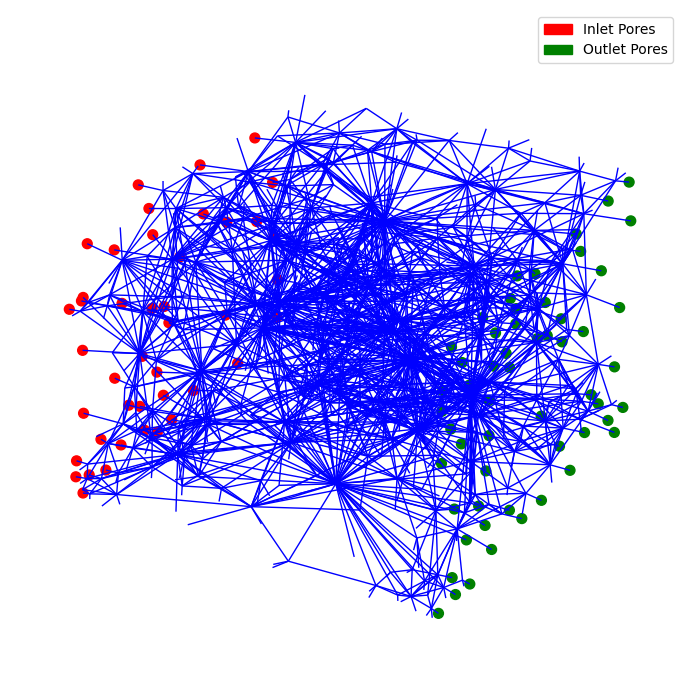

In [31]:
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='Inlet Pores')
green_patch = mpatches.Patch(color='green', label='Outlet Pores')

fig, ax = plt.subplots(figsize=(7, 7))
op.visualization.plot_connections(network=pn, ax=ax)
op.visualization.plot_coordinates(network=pn, pores=pn.pores('left'), 
                                    markersize=50, ax=ax, c='r')
op.visualization.plot_coordinates(network=pn, pores=pn.pores('right'), 
                                    markersize=50, ax=ax, c='g')
plt.axis('off')
plt.legend(handles=[red_patch,green_patch])